<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [3]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2022-09-23 07:59:34--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2022-09-23 07:59:34 (4.10 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2022-09-23 07:59:34--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43191

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

BEKASI

In [25]:
# Mengubah file csv menjadi dataframe

df1 = pd.read_csv('bekasi.csv')
df1.drop(df1.iloc[:,12:26], axis=1, inplace= True)
df1.drop(columns='created_at', axis=1, inplace=True)
df1.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08
1,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08
2,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08
3,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09
4,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09


In [26]:
df1.drop(columns='hadap', axis=1, inplace=True)
df1.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08
1,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08
2,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08
3,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09
4,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          107 non-null    float64
 1   LB          107 non-null    float64
 2   KT          107 non-null    float64
 3   KM          106 non-null    float64
 4   garasi      33 non-null     float64
 5   carport     81 non-null     float64
 6   lokasi      107 non-null    object 
 7   sertifikat  106 non-null    object 
 8   listrik     101 non-null    float64
 9   harga       107 non-null    float64
dtypes: float64(8), object(2)
memory usage: 77.6+ KB


In [28]:
df1.isnull().sum()

LT            885
LB            885
KT            885
KM            886
garasi        959
carport       911
lokasi        885
sertifikat    886
listrik       891
harga         885
dtype: int64

In [29]:
bks = df1.drop_duplicates()
bks

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08
1,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08
2,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08
3,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09
4,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09
...,...,...,...,...,...,...,...,...,...,...
102,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,1.600000e+09
103,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,8.500000e+08
104,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08
105,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,3.000000e+08


In [30]:
bks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 107
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          103 non-null    float64
 1   LB          103 non-null    float64
 2   KT          103 non-null    float64
 3   KM          102 non-null    float64
 4   garasi      31 non-null     float64
 5   carport     78 non-null     float64
 6   lokasi      103 non-null    object 
 7   sertifikat  102 non-null    object 
 8   listrik     97 non-null     float64
 9   harga       103 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.9+ KB


In [31]:
bksc= bks.fillna(bks.median())

bksc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,71.0,43.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08
1,59.0,60.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,2200.0,4.400000e+08
2,124.0,95.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,2200.0,6.990000e+08
3,144.0,100.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09
4,108.0,100.0,3.0,2.0,1.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09
...,...,...,...,...,...,...,...,...,...,...
102,180.0,220.0,5.0,3.0,1.0,1.0,Kota Bekasi,SHM,2200.0,1.600000e+09
103,140.0,250.0,3.0,2.0,1.0,1.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08
104,60.0,55.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08
105,36.0,60.0,2.0,1.0,1.0,1.0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08


In [32]:
bksc.isnull().sum()

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        1
sertifikat    2
listrik       0
harga         0
dtype: int64

In [33]:
bksc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 107
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          104 non-null    float64
 1   LB          104 non-null    float64
 2   KT          104 non-null    float64
 3   KM          104 non-null    float64
 4   garasi      104 non-null    float64
 5   carport     104 non-null    float64
 6   lokasi      103 non-null    object 
 7   sertifikat  102 non-null    object 
 8   listrik     104 non-null    float64
 9   harga       104 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.9+ KB


In [34]:
bksc['lokasi'] = bksc['lokasi'].astype('category')
bksc['sertifikat'] = bksc['sertifikat'].astype('category')
bksc.dtypes

LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik        float64
harga          float64
dtype: object

In [35]:
bksc.shape

(104, 10)

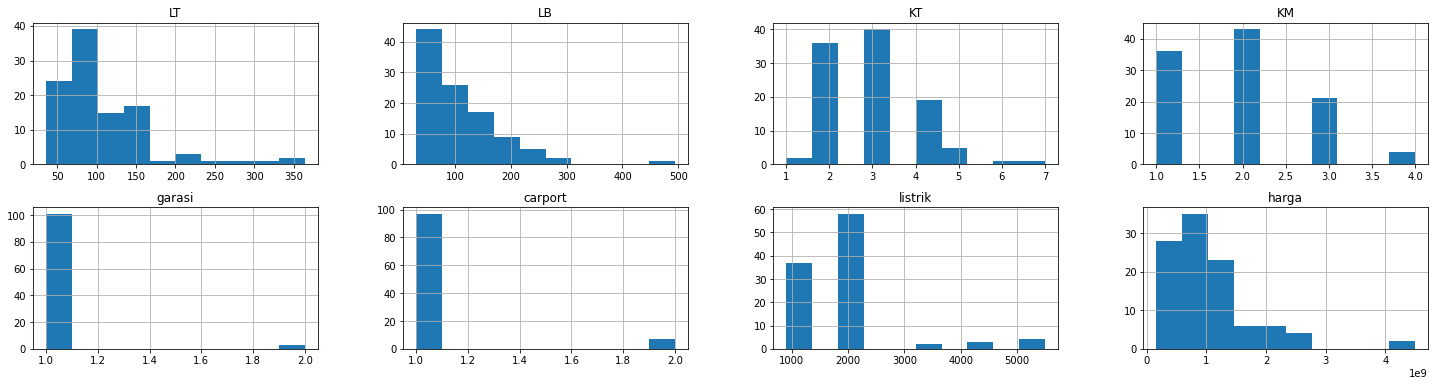

In [36]:
numerical = bksc.select_dtypes(include = ['category','float64']).columns

bksc[numerical].hist(figsize=(25, 6), layout=(2, 4));

In [37]:
bksc.duplicated().sum()

3

In [38]:
# Melihat Missing Values
print(bksc.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        1
sertifikat    2
listrik       0
harga         0
dtype: int64


In [39]:
#menghapus entri yang memiliki data duplikat 
bksc.drop_duplicates(inplace=True)
print(bksc.duplicated().sum()) # tidak ada lagi duplikat
print(bksc.shape) # mengecek ulang dengan print size data

0
(101, 10)


In [40]:
# Melihat Missing Values
print(bksc.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        1
sertifikat    2
listrik       0
harga         0
dtype: int64


In [41]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

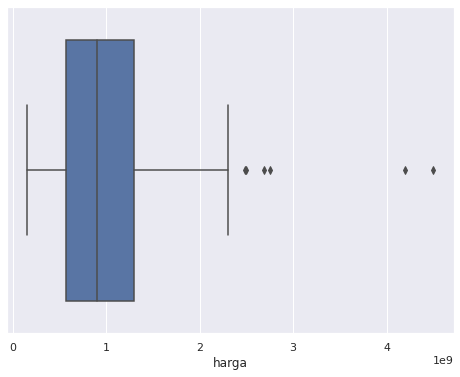

In [42]:
plt.figure(figsize=(8,6))
p = sns.boxplot(x="harga", data= bksc)

In [43]:
bksc.describe() 

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,1.010000e+02
mean,107.188119,106.762376,2.940594,1.910891,1.029703,1.069307,2074.257426,1.052734e+09
std,59.056026,70.304075,1.027831,0.837843,0.170613,0.255242,963.706746,7.472728e+08
min,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,900.000000,1.600000e+08
25%,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,5.750000e+08
50%,90.000000,90.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,9.000000e+08
75%,126.000000,141.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.300000e+09
max,364.000000,494.000000,7.000000,4.000000,2.000000,2.000000,5500.000000,4.500000e+09


## **BOGOR**

In [ ]:
# Mengubah file csv menjadi dataframe

df2 = pd.read_csv('bogor.csv')
df2.drop(df2.iloc[:,12:26], axis=1, inplace= True)
df2.drop(columns='created_at', axis=1, inplace=True)
df2.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08
1,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08
2,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08
3,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09
4,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          193 non-null    float64
 1   LB          193 non-null    float64
 2   KT          193 non-null    float64
 3   KM          193 non-null    float64
 4   garasi      193 non-null    float64
 5   carport     193 non-null    float64
 6   lokasi      193 non-null    object 
 7   sertifikat  193 non-null    object 
 8   listrik     193 non-null    float64
 9   hadap       19 non-null     object 
 10  harga       193 non-null    float64
dtypes: float64(8), object(3)
memory usage: 86.0+ KB


In [ ]:
df2 = df2.fillna()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,2076.165803,1.289362e+09
std,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,1562.633932,2.115854e+09
min,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,900.000000,6.500000e+07
25%,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,3.990000e+08
50%,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,6.700000e+08
75%,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1.250000e+09
max,1500.000000,1200.000000,8.000000,6.000000,3.000000,8.000000,17600.000000,1.650000e+10


In [10]:
# Mengubah file csv menjadi dataframe

df3 = pd.read_csv('depok.csv')
df3.drop(df3.iloc[:,12:26], axis=1, inplace= True)
df3.drop(columns='created_at', axis=1, inplace=True)
df3.drop(columns='hadap', axis=1, inplace=True)
df3.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0
1,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0
2,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0
3,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0
4,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0


In [11]:
df3 = df3.dropna(how='all').reset_index(drop=True)

In [12]:
df3[['garasi', 'carport']] = df3[['garasi', 'carport']].fillna(0)
df3

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2100.0
1,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,250.0
2,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,250.0
3,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,250.0
4,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...
115,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,195.0
116,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,185.0
117,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,1750.0
118,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
df3 = df3.drop([118, 119], axis=0)
df3

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2100.0
1,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,250.0
2,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,250.0
3,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,250.0
4,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...
113,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,750.0
114,72,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,NaN,1000.0
115,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,195.0
116,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,185.0


In [14]:
df3['listrik'] = df3['listrik'].fillna(method='bfill')

In [17]:
df3.drop_duplicates(inplace=True)

In [23]:
df3[['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'listrik', 'harga']] = df3[['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'listrik', 'harga']].astype('int64')

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 117
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          106 non-null    int64  
 1   LB          106 non-null    int64  
 2   KT          106 non-null    int64  
 3   KM          106 non-null    int64  
 4   garasi      106 non-null    int64  
 5   carport     106 non-null    int64  
 6   lokasi      106 non-null    object 
 7   sertifikat  106 non-null    object 
 8   listrik     106 non-null    float64
 9   harga       106 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 9.1+ KB


In [44]:
df3.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,125.811321,96.424528,2.783019,1.924528,0.405660,1.415094,2140.566038,1245.830189
std,179.747342,96.520508,1.060141,0.953171,1.002647,1.170005,1152.453144,1534.867076
min,36.000000,15.000000,2.000000,1.000000,0.000000,0.000000,900.000000,41.000000
25%,62.000000,47.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,498.000000
50%,74.500000,61.500000,3.000000,2.000000,0.000000,1.000000,2200.000000,829.000000
75%,100.000000,102.250000,3.000000,2.000000,0.000000,2.000000,2200.000000,1137.500000
max,1024.000000,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000


In [ ]:
# Mengubah file csv menjadi dataframe

df4 = pd.read_csv('jakarta.csv')
df4.drop(df4.iloc[:,12:26], axis=1, inplace= True)
df4.drop(columns='created_at', axis=1, inplace=True)
df4.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09
1,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09
2,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08
3,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08
4,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          121 non-null    float64
 1   LB          121 non-null    float64
 2   KT          121 non-null    float64
 3   KM          121 non-null    float64
 4   garasi      44 non-null     float64
 5   carport     90 non-null     float64
 6   lokasi      121 non-null    object 
 7   sertifikat  119 non-null    object 
 8   listrik     120 non-null    float64
 9   hadap       36 non-null     object 
 10  harga       121 non-null    float64
dtypes: float64(8), object(3)
memory usage: 88.1+ KB


In [ ]:
# Mengubah file csv menjadi dataframe

df5 = pd.read_csv('tangerang.csv')
df5.drop(df5.iloc[:,12:26], axis=1, inplace= True)
df5.drop(columns='created_at', axis=1, inplace=True)
df5.head()

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0
1,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0
2,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0
3,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0
4,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          124 non-null    float64
 1   LB          124 non-null    float64
 2   KT          124 non-null    float64
 3   KM          124 non-null    float64
 4   garasi      38 non-null     float64
 5   carport     92 non-null     float64
 6   lokasi      124 non-null    object 
 7   sertifikat  122 non-null    object 
 8   listrik     111 non-null    float64
 9   hadap       49 non-null     object 
 10  harga       124 non-null    float64
dtypes: float64(8), object(3)
memory usage: 11.1+ KB


## Jawaban dari Petunjuk
Kali ini kami hanya bisa membandingkan kota Bekasi dengan kota Depok

1. Menurut kelompok kami, kualitas data yang dimiliki perusahaan ini masih kurang baik karena terlalu banyak missing value. Contohnya pada kolom "hadap" banyak data yang hilang sehingga kolom "hadap" harus di drop.
2. 
3. Rata-rata harga suatu rumah di kota Bekasi yaitu Rp. 1.052.734.000 dibandingkan dengan kota Depok yaitu Rp. 1.245.830.189, maka rata-rata harga rumah di kota Bekasi cenderung lebih murah dibandingkan dengan harga rumah di kota Depok.
4. 
5. 
6. 
7. 